## Problem 1:
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

### Import the dataset

In [2]:
exit_poll = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
exit_poll = exit_poll.drop('Unnamed: 0',axis=1)
exit_poll.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


### Shape of the Dataset

In [3]:
print(f'Number of Rows: {exit_poll.shape[0]}')
print(f'Number of Columns: {exit_poll.shape[1]}')

Number of Rows: 1525
Number of Columns: 9


### Datatypes of each variables

In [4]:
exit_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


### Summary Statistics

In [5]:
exit_poll.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Average age of voter is 54 years.  We have the youngest voter as 24 years and oldest voter as 93 years old.
- Male and Female voters are equally present in the dataset.

### Null value Check

In [6]:
exit_poll.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### Check for Duplicates

In [7]:
print('Number of Duplicated Rows: ',exit_poll.duplicated().sum())

exit_poll[exit_poll.duplicated()]

Number of Duplicated Rows:  8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


We have 8 rows of duplicate observation, which shall be removed from the original dataset for further processing.

In [8]:
#Duplicate row removed.
exit_poll.drop_duplicates(inplace=True,ignore_index=True)
exit_poll

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,male
1513,Conservative,73,2,2,4,4,8,2,male
1514,Labour,37,3,3,5,4,2,2,male
1515,Conservative,61,3,3,1,4,11,2,male


In [9]:
print(f'Number of Rows after removing duplicates: {exit_poll.shape[0]}')
print(f'Number of Columns after removing duplicates: {exit_poll.shape[1]}')

Number of Rows after removing duplicates: 1517
Number of Columns after removing duplicates: 9


In [10]:
from scipy.stats import skew
for i in exit_poll.columns.difference(['vote','gender']):
    print('Skewness in {} = {}'.format(i,skew(exit_poll[i])))
    print()

Skewness in Blair = -0.5389805841647254

Skewness in Europe = -0.1417506103835579

Skewness in Hague = 0.14604675166469203

Skewness in age = 0.1396615989084527

Skewness in economic.cond.household = -0.144005097351352

Skewness in economic.cond.national = -0.23823834819079348

Skewness in political.knowledge = -0.42250931746800596



Skewness for all the variables are close to zero, thus all the variables are normally distributed.

### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [11]:
for i in exit_poll.columns.difference(['age']):
    print(exit_poll[i].value_counts())

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64
11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64
2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64
3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64
3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64
female    808
male      709
Name: gender, dtype: int64
2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64
Labour          1057
Conservative     460
Name: vote, dtype: int64


## Univariate

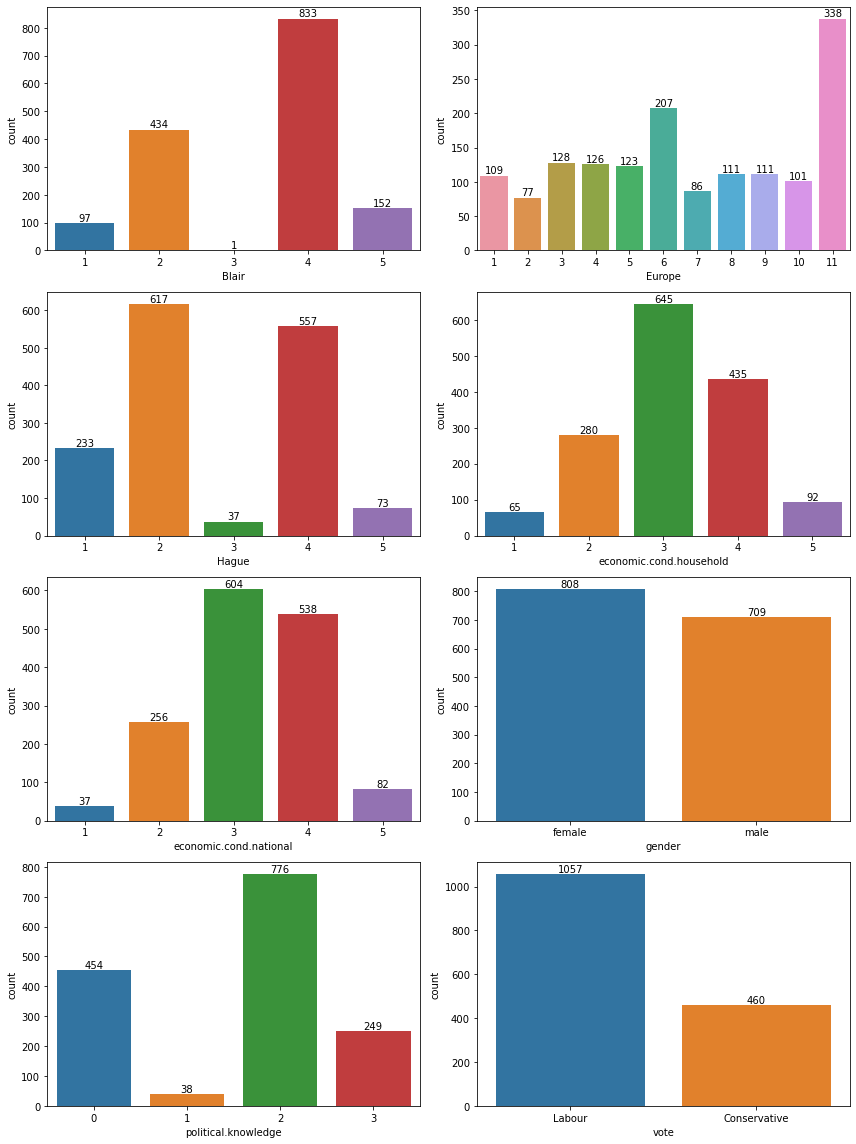

In [12]:
#Value Counts for each categorical variable
fig,axes = plt.subplots(4,2,figsize=(12,16))
for i,j in zip(exit_poll.columns.difference(['age']),axes.flatten()):
    sns.countplot(x=i,data=exit_poll,ax=j)
    j.bar_label(j.containers[0]) 
    plt.tight_layout()

- Assesment score of both the leaders **Hague** and **Blair** has very small number of vote who chose '**3**'

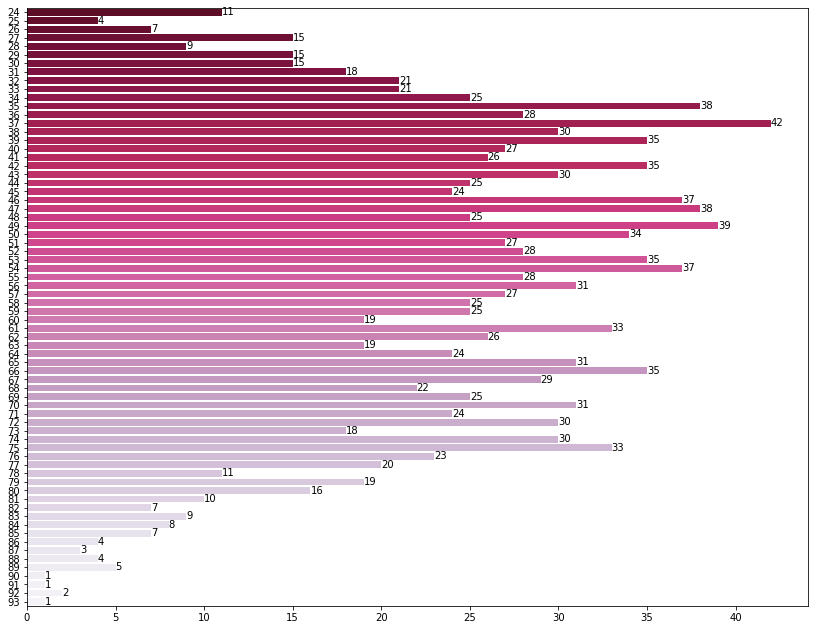

In [13]:
plt.figure(figsize=(14,11))
g = sns.barplot(y=exit_poll['age'].value_counts()[exit_poll['age'].value_counts()>0].index,
            x=exit_poll['age'].value_counts()[exit_poll['age'].value_counts()>0].values,palette='PuRd_r',orient='h')
g.bar_label(g.containers[0]);

- As we can see that most of the voter are between the age of 30 to 75 years.
- We can also notice that there is a more number of voters clustered among the age of 60-70 years.


In [14]:
#Response Ratio
exit_poll['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

<AxesSubplot:xlabel='vote', ylabel='count'>

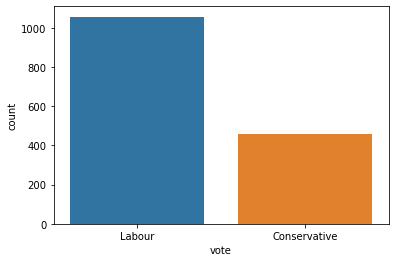

In [282]:
sns.countplot(x=exit_poll['vote'])

As far the class representation, we have a very decent ratio of 70:30 of both classes. Thus we may not need for any class balance technique.

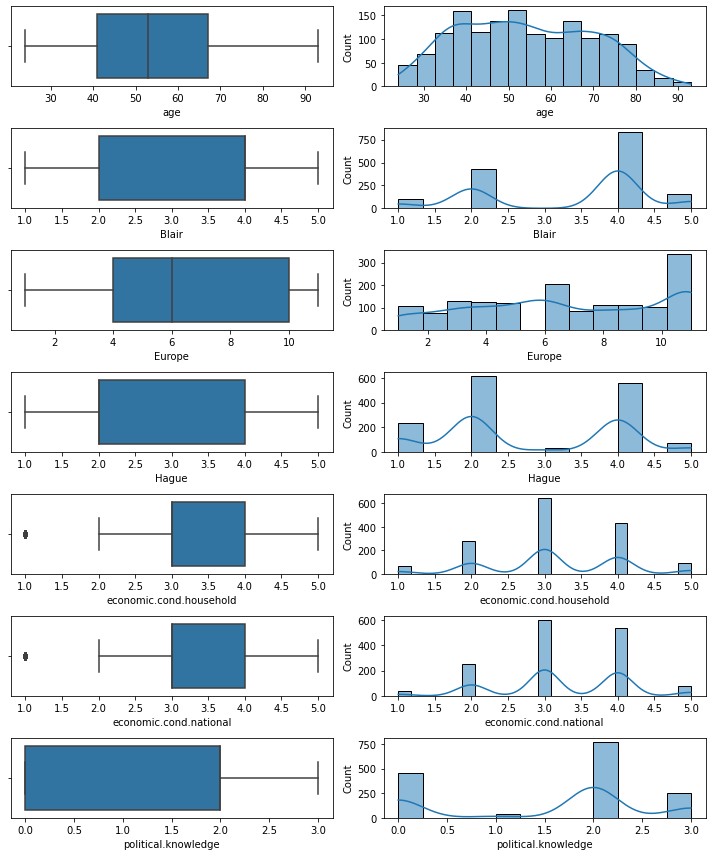

In [15]:
col = ['age','Blair','Europe','Hague','economic.cond.household','economic.cond.national','political.knowledge']
fig,axes = plt.subplots(7,2,figsize=(10,12))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
for i,j in zip(col,range(0,7)):
    sns.boxplot(x=exit_poll[i],ax=axes[:,0][j])
    sns.histplot(x=exit_poll[i],kde=True,ax=axes[:,1][j])
    plt.tight_layout()

Age is the only continous variable, which has no outliers. Thus no outlier treatment is necessary.

## Bivariate & Multivariate

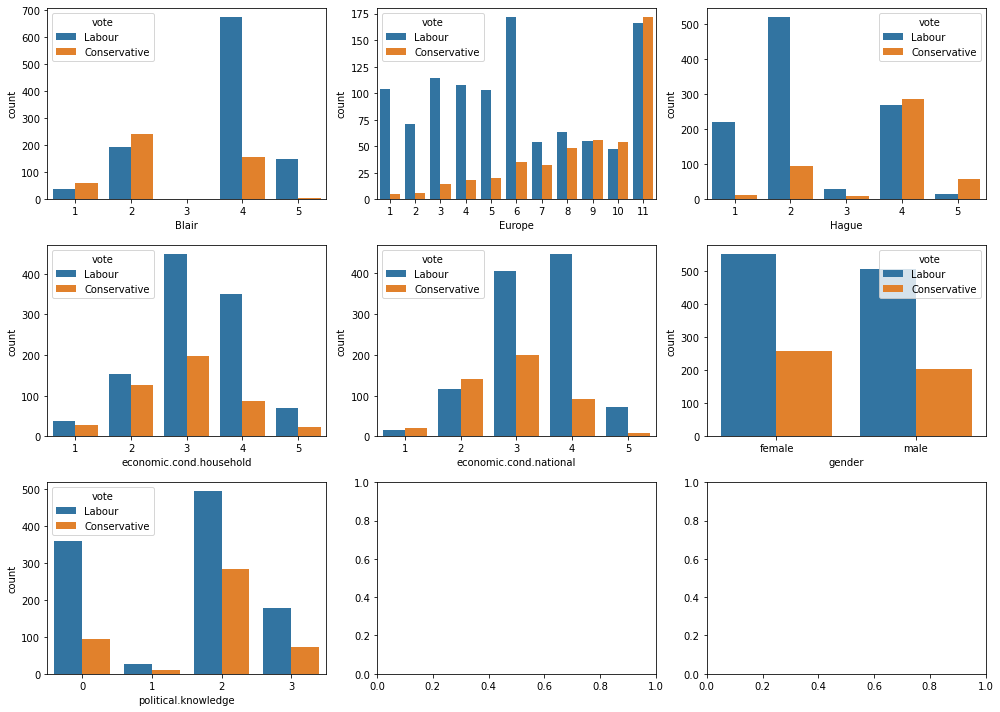

In [16]:
#Target variable vs Categorical Independent variable
fig,axes = plt.subplots(3,3,figsize=(14,10))
for col,ax in zip(exit_poll.columns.difference(['age','vote']),axes.flatten()):
    sns.countplot(x=col,hue='vote',data=exit_poll,ax=ax)
    plt.tight_layout()

- It's evident that when the asssement of the Leader from each party is higher then they are more likely to vote for that party. For example, When assement score for **_Blair_** is more than 3 then they are more likely to vote for **Labor Party**. Meanwhile when assement score for **_Hague_** is more than 3 then they are more likely to vote for **Conservative Party**.
- Person with more 'Eurosceptic' sentiment (>9 score) are more likely to vote for **Conservative Party**.
- Higher the **_economic.cond.nation_**, more likely to vote for **Labour Party**.
- **_Gender_** does not have significance in voting for either party.
- Level of **_political.knowledge_** also does not help in identifying the voters.


In [17]:
#sns.histplot(x='age',data=exit_poll,hue='vote',kde=True)

<AxesSubplot:xlabel='vote', ylabel='age'>

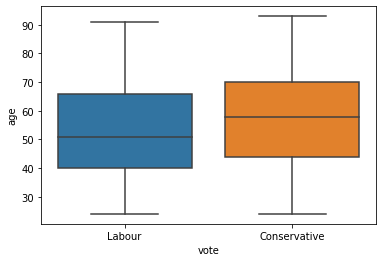

In [18]:
sns.boxplot(y='age',data=exit_poll,x='vote')

#### Median Age of Labour Party voters is slighlity lesser than that of Conservative Party voters. Thus more of young voters are tend to vote for Labour party compared to Conservative party

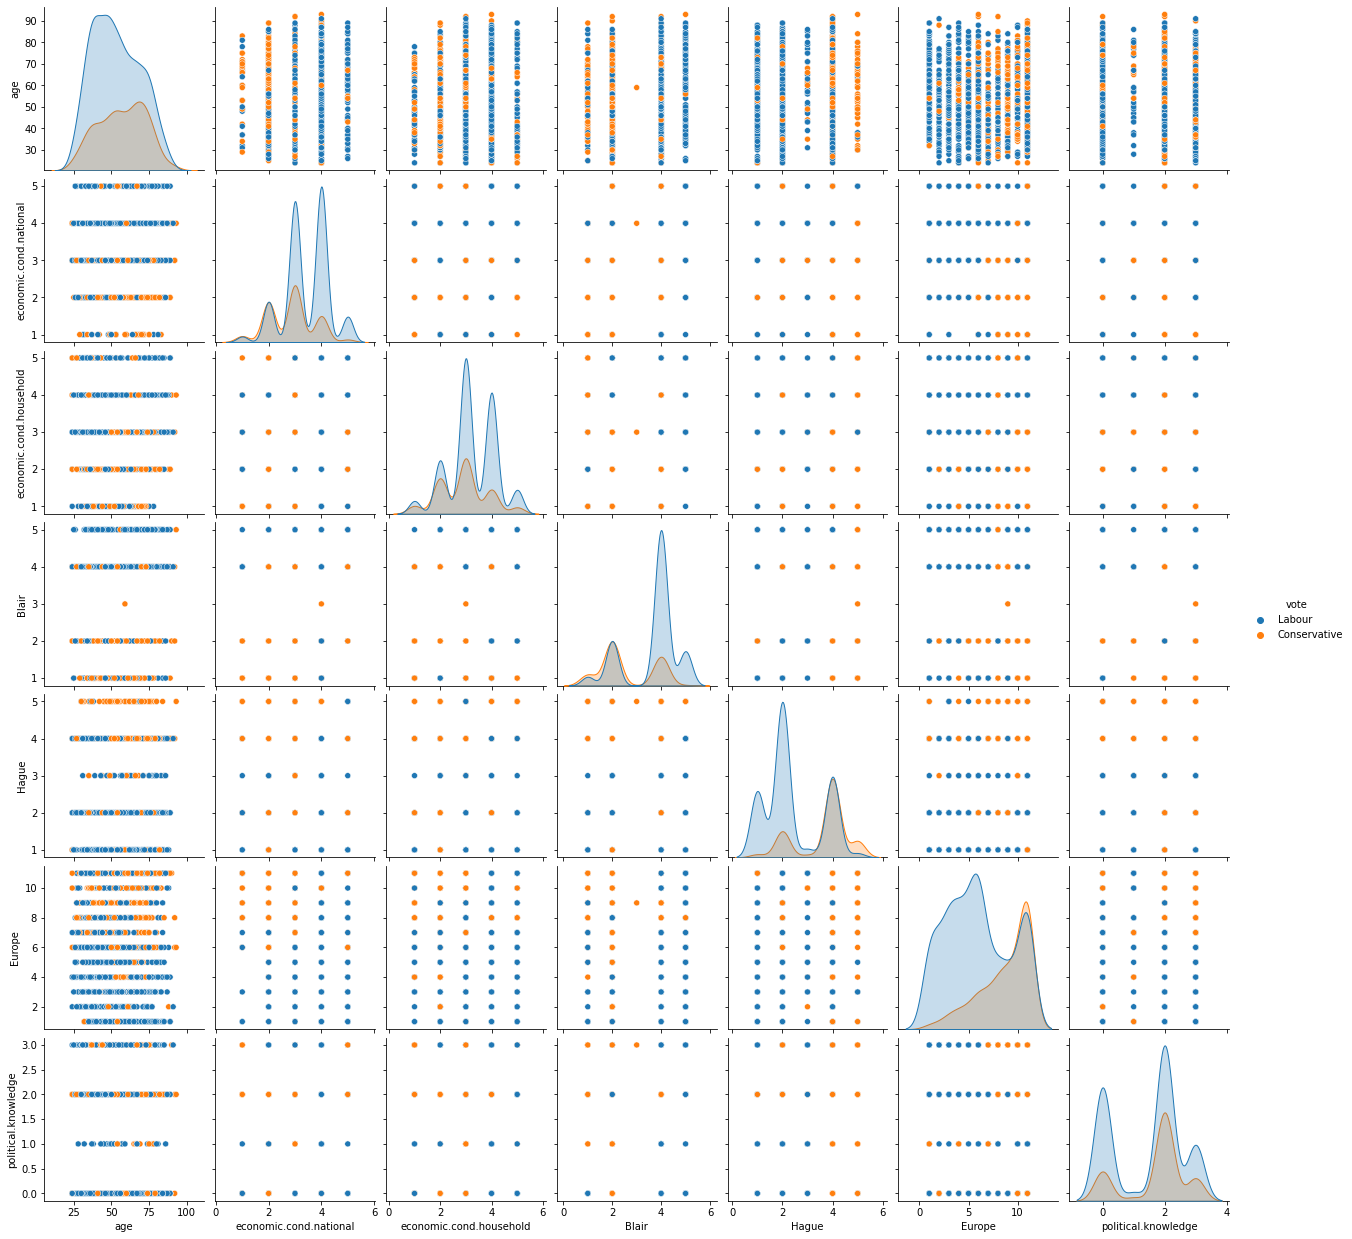

In [19]:
sns.pairplot(data=exit_poll,hue='vote')

- Pair polt show that no varialbe has any type of correlation with any variable

<AxesSubplot:>

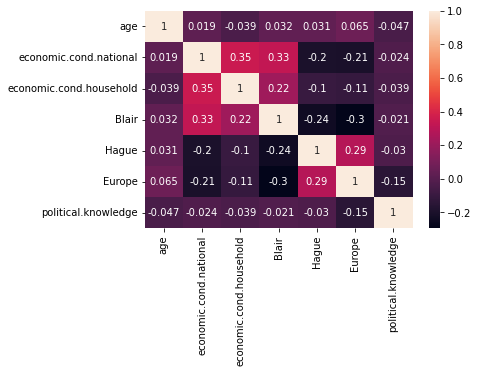

In [20]:
sns.heatmap(exit_poll.corr(),annot=True)

From the above correlation matrix we can see that none of the variable is significantly correlated with any other variables.

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

As most of the data is encoded already we only need to encode the variable '**_Gender_**'. We shall use **pd.get_dummies(drop_first=True)** for encoding.

In [21]:
exit_poll['gender'] = pd.get_dummies(exit_poll['gender'],drop_first=True)

In [22]:
exit_poll.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


- Column '**gender**' has been encoded with dummy variable. When it is 0 then it represents female and male when it is 1.

### Why do we need Scaling?

When different variables are in different scales and thus having a different variance which in trun makes variables with higher scale of difference has more weightage. Thus it is necessary to scale all the variables to have mean of 0 and standard deviation of 1. The standard score of a sample x is calculated as:
$$z=\frac{(x-\bar{x})}s$$ <br>

(OR) <br>

$$\frac{(X - X_{min})}{(X_{max} - X_{min})}$$

$\bar{x}$ is mean of the feature and s is the standard deviation. Scaling happens independently on each feature in the dataset. Mean and Standard Deviation are stored to use later for transform the data. We can also use the Min-Max scaler as here since many of the variables are ordinal variables thus it makes sense to use Min-Max scaler.

However, most of the variables are categorical in nature except age we dont' need scaling for this dataset.


In [289]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
exit_poll_sc = sc.fit_transform(X=exit_poll.drop(['vote','gender'],axis=1))
exit_poll_sc = pd.DataFrame(exit_poll_sc,columns=['age','Blair','Europe','Hague','economic.cond.household','economic.cond.national','political.knowledge'])
exit_poll_sc['vote'] = exit_poll['vote'].map({'Labour':0,'Conservative':1})
exit_poll_sc['gender']=exit_poll['gender']
exit_poll_sc

,age,Blair,Europe,Hague,economic.cond.household,economic.cond.national,political.knowledge,vote,gender
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0,0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,0,1
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,0,1
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0,0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,0,1
...,...,...,...,...,...,...,...,...,...
1512,0.623188,1.00,0.50,0.25,0.75,1.0,1.000000,1,1
1513,0.710145,0.25,0.25,0.75,0.75,0.7,0.666667,1,1
1514,0.188406,0.50,0.50,1.00,0.75,0.1,0.666667,0,1
1515,0.536232,0.50,0.50,0.00,0.75,1.0,0.666667,1,1


In [290]:
print('Variance Before Scaling: \n',exit_poll.var(numeric_only=True))

Variance Before Scaling: 
 age                        246.544655
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender                       0.249099
dtype: float64


In [291]:
print('Variance After Scaling: \n',exit_poll_sc.var(numeric_only=True))

Variance After Scaling: 
 age                        0.051784
Blair                      0.048597
Europe                     0.054181
Hague                      0.086256
economic.cond.household    0.094938
economic.cond.national     0.108837
political.knowledge        0.130662
vote                       0.211421
gender                     0.249099
dtype: float64


- Variance in the dataset is minimized almost same for all the features. Eventhough we don't need scaling for Logistic Regression, LDA, Naive Bayes,Bagging or Boosting. 

- KNN is sensitive to scale of the each variables as it is a distance based model.Thus we have scaled the variable to a common scale between 0 to 1.

In [26]:
exit_poll_sc['gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1517 entries, 0 to 1516
Series name: gender
Non-Null Count  Dtype
--------------  -----
1517 non-null   uint8
dtypes: uint8(1)
memory usage: 1.6 KB


In [27]:
#Split the Independent variable and dependent variable as X and y respectiviely
X = exit_poll.drop('vote',axis=1)
y = exit_poll['vote']

In [28]:
#Splitting of the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [29]:
X_sc = exit_poll_sc.drop('vote',axis=1)
y_sc = exit_poll_sc['vote']

In [30]:
X_train_sc,X_test_sc,Y_train,Y_test = train_test_split(X_sc,y_sc,test_size=0.3,random_state=1,stratify=y)

In [31]:
print('Shape of X_train set: ',X_train.shape)
print('Shape of X_test set: ',X_test.shape)
print('Shape of Y_train set: ',Y_train.shape)
print('Shape of Y_test set: ',Y_test.shape)

Shape of X_train set:  (1061, 8)
Shape of X_test set:  (456, 8)
Shape of Y_train set:  (1061,)
Shape of Y_test set:  (456,)


In [32]:
Y_train.value_counts(normalize=True)

0    0.696513
1    0.303487
Name: vote, dtype: float64

In [33]:
Y_test.value_counts(normalize=True)

0    0.697368
1    0.302632
Name: vote, dtype: float64

#### Reason for Data Split:
Every data set must be split into train set and test set data in order to train the model first using train data and then test the performance of the model on the unseen data using test data. By doing then we can access the generalisation of the model for any unseen data, if in case the model is performing well on the train set but not on the test set of data, then it's evident that the model is overfit and generalised.

It's common practice to use 1/4 th of the data for test and the remaining for training purpose. And by using Stratify in train_test_split we shall maintain the same response ratio (Response ratio: ratio of response of class of interest againts other class)

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [34]:
from sklearn.linear_model import LogisticRegression
model_logi = LogisticRegression(random_state=1,max_iter=1000)
model_logi.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=1)

Logistic Regression model Train Accuracy:  0.8284637134778511
Logistic Regression model Test Accuracy:  0.8552631578947368

 CLASSIFICATION REPORT FOR TRAIN 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       739
           1       0.74      0.66      0.70       322

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061

CLASSIFICATION REPORT FOR TEST 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       318
           1       0.81      0.68      0.74       138

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



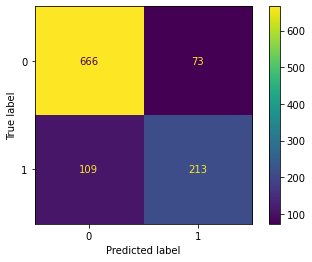

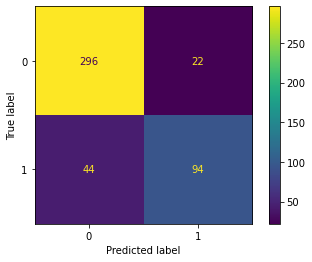

In [35]:
print('Logistic Regression model Train Accuracy: ',model_logi.score(X_train,Y_train))
print('Logistic Regression model Test Accuracy: ',model_logi.score(X_test,Y_test))
print('\n CLASSIFICATION REPORT FOR TRAIN \n',classification_report(Y_train,model_logi.predict(X_train)))
print('CLASSIFICATION REPORT FOR TEST \n',classification_report(Y_test,model_logi.predict(X_test)))
metrics.plot_confusion_matrix(model_logi,X_train,Y_train)
metrics.plot_confusion_matrix(model_logi,X_test,Y_test)

- Model becomes overfit when the test performance (Accuracy) is 10% below the train performance (Accuracy).
- Here the train accuracy is ~83% whereas test accuracy is ~86% which higher than the train accuracy also the difference is not vast as there is only 5% difference. Thus the model is neither overfit nor underfit it's decent fit and a good generalisation on unknow data.

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

LDA model Train Accuracy:  0.822808671065033
LDA model Test Accuracy:  0.8530701754385965

 CLASSIFICATION REPORT FOR TRAIN 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       739
           1       0.72      0.67      0.70       322

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061

CLASSIFICATION REPORT FOR TEST 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       318
           1       0.80      0.69      0.74       138

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



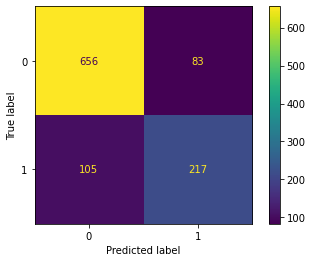

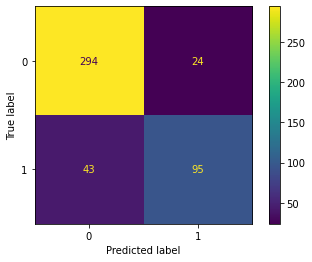

In [37]:
print('LDA model Train Accuracy: ',model_lda.score(X_train,Y_train))
print('LDA model Test Accuracy: ',model_lda.score(X_test,Y_test))
print('\n CLASSIFICATION REPORT FOR TRAIN \n',classification_report(Y_train,model_lda.predict(X_train)))
print('CLASSIFICATION REPORT FOR TEST \n',classification_report(Y_test,model_lda.predict(X_test)))
metrics.plot_confusion_matrix(model_lda,X_train,Y_train)
metrics.plot_confusion_matrix(model_lda,X_test,Y_test)

- Model becomes overfit when the test performance (Accuracy) is 10% below the train performance (Accuracy).
- Here the train accuracy is ~82% whereas test accuracy is ~85% which higher than the train accuracy also the difference is not vast as there is only 5% difference. Thus the model is neither overfit nor underfit it's decent fit and a good generalisation on unknow data.

### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [285]:
print('KNN model Train Accuracy score: ',model_knn.score(X_train,Y_train))
print('KNN model Test Accuracy score: ',model_knn.score(X_test,Y_test))

KNN model Train Accuracy score:  0.8482563619227145
KNN model Test Accuracy score:  0.8070175438596491


In [293]:
#KNN model with scaled variables
model_knn.fit(X_train_sc,Y_train)
print('KNN model Train Accuracy score: ',model_knn.score(X_train_sc,Y_train))
print('KNN model Test Accuracy score: ',model_knn.score(X_test_sc,Y_test))

KNN model Train Accuracy score:  0.8680490103675778
KNN model Test Accuracy score:  0.8442982456140351


As we can see that the scaled variables help in increasing the performance of the model. We shall use scaled variables for KNN model.

In [40]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)

GaussianNB()

In [41]:
print('Naive Bayes model Train Accuracy score: ',model_nb.score(X_train,Y_train))
print('Naive Bayes model Test Accuracy score: ',model_nb.score(X_test,Y_test))

Naive Bayes model Train Accuracy score:  0.8199811498586239
Naive Bayes model Test Accuracy score:  0.8574561403508771


In [262]:
pred_test_NB = model_nb.predict(X_test)

### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [42]:
#Bagging
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier(base_estimator=model_dt)
model_bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [43]:
print('Bagging Accuracy on Train Accuracy: ',model_bag.score(X_train,Y_train))
print('Bagging Accuracy on Test Accuracy: ',model_bag.score(X_test,Y_test))

Bagging Accuracy on Train Accuracy:  0.9868049010367578
Bagging Accuracy on Test Accuracy:  0.8377192982456141


In [44]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,Y_train)

AdaBoostClassifier()

In [45]:
print('AdaBoosting Accuracy on Train Accuracy: ',model_ada.score(X_train,Y_train))
print('AdaBoosting Accuracy on Train Accuracy: ',model_ada.score(X_test,Y_test))

AdaBoosting Accuracy on Train Accuracy:  0.8397737983034873
AdaBoosting Accuracy on Train Accuracy:  0.8355263157894737


In [67]:
#GradiantBoost
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train,Y_train)

GradientBoostingClassifier()

In [68]:
print('GB model Train Accuracy: ',model_XGB.score(X_train,Y_train))
print('GB model Test Accuracy: ',model_XGB.score(X_test,Y_test))

GB model Train Accuracy:  0.885956644674835
GB model Test Accuracy:  0.8399122807017544


### KNN with best parametes

In [48]:
#KNN with best parameters
KNeighborsClassifier()
params_KNN = {'n_neighbors':list(range(1,21,2)),
         'metric':['euclidean','chebyshev','manhattan']}
grid_search_KNN = GridSearchCV(model_knn,param_grid = params_KNN,scoring = 'precision',cv=10,n_jobs=-1)
grid_search_KNN.fit(X_train,Y_train)
KNN_model = grid_search_KNN.best_estimator_

In [49]:
grid_search_KNN.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [50]:
pred_train_KNN = KNN_model.predict(X_train)
pred_test_KNN = KNN_model.predict(X_test)
print("Train Accuracy: {}".format(KNN_model.score(X_train,Y_train)))
print("Test Accuracy: {}".format(KNN_model.score(X_test,Y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(Y_train,pred_train_KNN))
print()
print('Classification Report Test')
print(metrics.classification_report(Y_test,pred_test_KNN))

Train Accuracy: 0.825636192271442
Test Accuracy: 0.8442982456140351

Classification Report Train
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       739
           1       0.76      0.62      0.68       322

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.82      0.83      0.82      1061


Classification Report Test
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       318
           1       0.79      0.67      0.72       138

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



### LDA with Best Parameters

In [51]:
#LDA with best parameters
LinearDiscriminantAnalysis()
params_LDA = {'solver':['svd','lsqr','eigen'],
                'tol':[0.001,0.0001]
                }
grid_search_LDA = GridSearchCV(estimator=model_lda,param_grid=params_LDA,n_jobs=-1,cv=5)
grid_search_LDA.fit(X_train,Y_train)
grid_search_LDA.best_params_

{'solver': 'svd', 'tol': 0.001}

In [52]:
LDA_model = grid_search_LDA.best_estimator_
pred_train_LDA_model = LDA_model.predict(X_train)
pred_test_LDA_model = LDA_model.predict(X_test)
print('Train Accuracy: {}'.format(LDA_model.score(X_train,Y_train)))
print('Test Accuracy: {}'.format(LDA_model.score(X_test,Y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(Y_train, pred_train_LDA_model))
print()
print('Classification Report Test')
print(metrics.classification_report(Y_test, pred_test_LDA_model))

Train Accuracy: 0.822808671065033
Test Accuracy: 0.8530701754385965

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       739
           1       0.72      0.67      0.70       322

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       318
           1       0.80      0.69      0.74       138

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



### Logistic Regression with Best parameters

In [53]:
LogisticRegression()
params_logi = {'penalty':['l2','none'],
                'solver':['newton-cg','lbfgs'],
                'tol':[0.0001,0.00001,0.000001],
                'max_iter':[1000,10000]}
grid_search_LOGI = GridSearchCV(estimator=model_logi,param_grid=params_logi,cv=5,n_jobs=-1)
grid_search_LOGI.fit(X_train,Y_train)
grid_search_LOGI.best_params_


{'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}

In [54]:
LOGI_model =grid_search_LOGI.best_estimator_
pred_train_Logi_model = LOGI_model.predict(X_train)
pred_test_Logi_model = LOGI_model.predict(X_test)
print('Train Accuracy: {}'.format(LOGI_model.score(X_train,Y_train)))
print('Test Accuracy: {}'.format(LOGI_model.score(X_test,Y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(Y_train, pred_train_Logi_model))
print()
print('Classification Report Test')
print(metrics.classification_report(Y_test, pred_test_Logi_model))

Train Accuracy: 0.8284637134778511
Test Accuracy: 0.8552631578947368

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       739
           1       0.74      0.66      0.70       322

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       318
           1       0.81      0.68      0.74       138

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



### Bagging with Best Parameters

In [62]:
BaggingClassifier()
params_DTB = {'n_estimators':list(range(101,202,2)),
              'max_samples':[0.4,0.6],
              'max_features':[0.4,0.6]
              }
grid_search_DTB = GridSearchCV(estimator=model_bag ,param_grid=params_DTB, cv = 5,n_jobs=-1,verbose=0)
grid_search_DTB.fit(X_train,Y_train)


In [63]:
grid_search_DTB.best_params_

{'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 201}

In [64]:
DTB_model = grid_search_DTB.best_estimator_
pred_train_DTB_model = DTB_model.predict(X_train)
pred_test_DTB_model = DTB_model.predict(X_test)
print('Train Accuracy: {}'.format(DTB_model.score(X_train,Y_train)))
print('Test Accuracy: {}'.format(DTB_model.score(X_test,Y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(Y_train, pred_train_DTB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(Y_test, pred_test_DTB_model))

Train Accuracy: 0.9472196041470311
Test Accuracy: 0.8355263157894737

Classification Report Train
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       739
           1       0.98      0.84      0.91       322

    accuracy                           0.95      1061
   macro avg       0.96      0.92      0.93      1061
weighted avg       0.95      0.95      0.95      1061


Classification Report Test
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       318
           1       0.82      0.58      0.68       138

    accuracy                           0.84       456
   macro avg       0.83      0.76      0.79       456
weighted avg       0.83      0.84      0.83       456



### AdaBoost with Best Parameters

In [69]:
params_ADAB = {'n_estimators':list(np.arange(101,202,2)),
              'learning_rate':[0.01,0.001,0.0001]}
grid_search_ADAB = GridSearchCV(estimator=model_ada,param_grid=params_ADAB,cv=5,n_jobs=-1)
grid_search_ADAB.fit(X_train,Y_train)
grid_search_ADAB.best_params_

{'learning_rate': 0.01, 'n_estimators': 175}

In [71]:
ADAB_model = grid_search_ADAB.best_estimator_
pred_train_ADAB_model = ADAB_model.predict(X_train)
pred_test_ADAB_model = ADAB_model.predict(X_test)
print('Train Accuracy: {}'.format(ADAB_model.score(X_train,Y_train)))
print('Test Accuracy: {}'.format(ADAB_model.score(X_test,Y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(Y_train, pred_train_ADAB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(Y_test, pred_test_ADAB_model))

Train Accuracy: 0.7822808671065034
Test Accuracy: 0.8070175438596491

Classification Report Train
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       739
           1       0.79      0.38      0.52       322

    accuracy                           0.78      1061
   macro avg       0.79      0.67      0.69      1061
weighted avg       0.78      0.78      0.76      1061


Classification Report Test
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       318
           1       0.85      0.44      0.58       138

    accuracy                           0.81       456
   macro avg       0.82      0.70      0.73       456
weighted avg       0.81      0.81      0.79       456



### GradiantBoosting with Best Parameters

In [74]:
params_GRADB = {'n_estimators':list(np.arange(101,202,2)),
               'learning_rate':[0.01,0.001,0.0001]}
grid_search_GRADB = GridSearchCV(estimator=model_GB,param_grid=params_GRADB,cv=5,n_jobs=-1)
grid_search_GRADB.fit(X_train,Y_train)
grid_search_GRADB.best_params_

{'learning_rate': 0.01, 'n_estimators': 201}

In [75]:
GRADB_model = grid_search_GRADB.best_estimator_
pred_train_GRADB_model = GRADB_model.predict(X_train)
pred_test_GRADB_model = GRADB_model.predict(X_test)
print('Train Accuracy: {}'.format(GRADB_model.score(X_train,Y_train)))
print('Test Accuracy: {}'.format(GRADB_model.score(X_test,Y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(Y_train, pred_train_GRADB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(Y_test, pred_test_GRADB_model))

Train Accuracy: 0.8463713477851084
Test Accuracy: 0.8486842105263158

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       739
           1       0.79      0.67      0.73       322

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       318
           1       0.79      0.68      0.73       138

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.85      0.85      0.85       456



In [171]:
models = [LOGI_model,LDA_model,KNN_model,model_nb,DTB_model,ADAB_model,GRADB_model]
model_name = ['Logistic','LDA','KNN','Naive_Bayes','Bagging','AdaBoost','GradBoost']
acc_train=[]
acc_test=[]

for i in models:
    acc_train.append(i.score(X_train,Y_train))
    acc_test.append(i.score(X_test,Y_test))
all_model_accu = pd.DataFrame({'Model':model_name,'Train_Accuracy':acc_train,'Test_Accuracy':acc_test})
all_model_accu['5perc_train_acc']= all_model_accu['Train_Accuracy']-all_model_accu['Train_Accuracy']*[0.1]
all_model_accu['Model_performance']=np.where(all_model_accu['Test_Accuracy']>=all_model_accu['5perc_train_acc'],'Good Fit','Overfitting')
#all_model_accu.drop('Test_Train_diff',axis=1,inplace=True)
all_model_accu

,Model,Train_Accuracy,Test_Accuracy,5perc_train_acc,Model_performance
0,Logistic,0.828464,0.855263,0.745617,Good Fit
1,LDA,0.822809,0.853070,0.740528,Good Fit
2,KNN,0.825636,0.844298,0.743073,Good Fit
3,Naive_Bayes,0.819981,0.857456,0.737983,Good Fit
4,Bagging,0.947220,0.835526,0.852498,Overfitting
5,AdaBoost,0.782281,0.807018,0.704053,Good Fit
6,GradBoost,0.846371,0.848684,0.761734,Good Fit


- After tuning the hyper parameters we can see that all the model has good train and test score except Bagging model which is overfitting as the Train score is more than 10% higher than test score.
- Naive Bayes model has the higher Test Accuracy score followed by Logisti Regression and LDA.


In [164]:
var_imp_AdaBoost = ADAB_model.feature_importances_
var_imp_AdaBoost = pd.DataFrame(var_imp_AdaBoost,index=X_test.columns,columns=['Imp_Ada'])
var_imp_AdaBoost.sort_values(by='Imp_Ada',ascending=False)

,Imp_Ada
Hague,0.44
Blair,0.28
Europe,0.28
age,0.00
economic.cond.national,0.00
economic.cond.household,0.00
political.knowledge,0.00
gender,0.00


In [165]:
var_imp_GRAD = GRADB_model.feature_importances_
var_imp_GRAD = pd.DataFrame(var_imp_GRAD,index=X_test.columns,columns=['Imp_Grad'])
var_imp_GRAD.sort_values(by='Imp_Grad',ascending=False)

,Imp_Grad
Hague,0.467274
Blair,0.180169
Europe,0.155915
political.knowledge,0.122993
age,0.040138
economic.cond.national,0.030657
economic.cond.household,0.002854
gender,0.000000


In [168]:
feature_importance = pd.merge(var_imp_AdaBoost,var_imp_GRAD,left_index=True,right_index=True,how='inner')
feature_importance.sort_values(by=['Imp_Ada','Imp_Grad'],ascending=False)

,Imp_Ada,Imp_Grad
Hague,0.44,0.467274
Blair,0.28,0.180169
Europe,0.28,0.155915
political.knowledge,0.00,0.122993
age,0.00,0.040138
economic.cond.national,0.00,0.030657
economic.cond.household,0.00,0.002854
gender,0.00,0.000000


According to feature importance we can see that the most two important variable is **Hague** and **Blair**. Thus, voters assesment of Candidates of both parties helps in predicting the voters choice of party to vote.

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [205]:
for i,j in zip(models,model_name):
    print('{} Train Accuracy Score:{:.2f}'.format(j,i.score(X_train,Y_train)))
    print('{} Test Accuracy Score: {:.2f}'.format(j,i.score(X_test,Y_test)))
    print()
    print('Classification Report for Train',classification_report(Y_train,i.predict(X_train)))
    print('Classification Report for Test',classification_report(Y_test,i.predict(X_test)))
    print()
    print('Confusion Matrix for Train \n',confusion_matrix(Y_train,i.predict(X_train)))
    print('Confusion Matrix for Test \n',confusion_matrix(Y_test,i.predict(X_test)))
    print()

Logistic Train Accuracy Score:0.83
Logistic Test Accuracy Score: 0.86

Classification Report for Train               precision    recall  f1-score   support

           0       0.86      0.90      0.88       739
           1       0.74      0.66      0.70       322

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061

Classification Report for Test               precision    recall  f1-score   support

           0       0.87      0.93      0.90       318
           1       0.81      0.68      0.74       138

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456


Confusion Matrix for Train 
 [[666  73]
 [109 213]]
Confusion Matrix for Test 
 [[296  22]
 [ 44  94]]

LDA Train Accuracy Score:0.82
LDA Test Accuracy Score: 0.85

Classification Report for Train               

In [223]:
for i,j in zip(models,model_name):
    probs_train = i.predict_proba(X_train)[:,1]
    probs_test = i.predict_proba(X_test)[:,1]
    print('AUC of {} for Train: {:.3f}'.format(j,roc_auc_score(Y_train,probs_train)))
    print('AUC of {} for Test: {:.3f}'.format(j,roc_auc_score(Y_test,probs_test)))
    print()

AUC of Logistic for Train: 0.877
AUC of Logistic for Test: 0.913

AUC of LDA for Train: 0.877
AUC of LDA for Test: 0.914

AUC of KNN for Train: 0.892
AUC of KNN for Test: 0.899

AUC of Naive_Bayes for Train: 0.873
AUC of Naive_Bayes for Test: 0.912

AUC of Bagging for Train: 0.993
AUC of Bagging for Test: 0.901

AUC of AdaBoost for Train: 0.853
AUC of AdaBoost for Test: 0.875

AUC of GradBoost for Train: 0.913
AUC of GradBoost for Test: 0.912



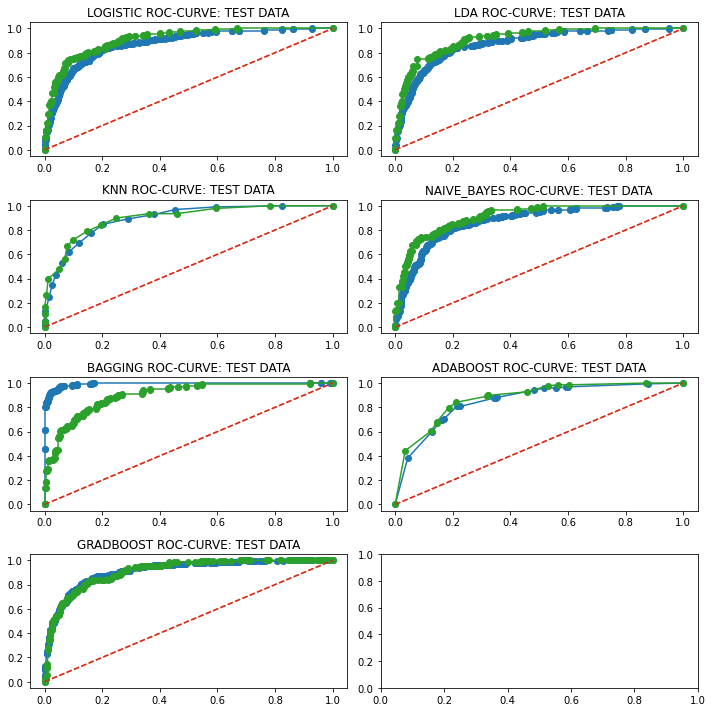

In [261]:
fig,axes = plt.subplots(4,2,figsize=(10,10))
for i,j,a in zip(models,model_name,axes.flatten()):
    probs_train = i.predict_proba(X_train)[:,1]
    fpr_train,tpr_train,thersholds_train = roc_curve(Y_train,probs_train)
    a.plot(fpr_train,tpr_train,marker='o')
    a.plot([0,1],[0,1],linestyle="--")
    a.set_title("{} ROC-CURVE: TRAIN DATA".format(j.upper()))
    plt.tight_layout()
    probs_test = i.predict_proba(X_test)[:,1]
    fpr_test,tpr_test,thersholds_test = roc_curve(Y_test,probs_test)
    a.plot(fpr_test,tpr_test,marker='o')
    a.plot([0,1],[0,1],linestyle="--")
    a.set_title("{} ROC-CURVE: TEST DATA".format(j.upper()))

In [268]:
#Tabuler form of all performance metrics for all models
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=[]
pre=[]
rec=[]
f1=[]
auc=[]
test_pred = [pred_test_Logi_model,pred_test_LDA_model,pred_test_KNN,
             pred_test_DTB_model,pred_test_GRADB_model,pred_test_ADAB_model,pred_test_NB]

for i in test_pred:
    acc.append(accuracy_score(Y_test,i))
    pre.append(precision_score(Y_test,i))
    rec.append(recall_score(Y_test,i))
    f1.append(f1_score(Y_test,i))
all_model_metric = pd.DataFrame({'Model':model_name,'Accuracy':acc,'Precision':pre,'Recall':rec,'f1 Score':f1})
all_model_metric

,Model,Accuracy,Precision,Recall,f1 Score
0,Logistic,0.855263,0.810345,0.681159,0.740157
1,LDA,0.853070,0.798319,0.688406,0.739300
2,KNN,0.844298,0.786325,0.666667,0.721569
3,Naive_Bayes,0.835526,0.824742,0.579710,0.680851
4,Bagging,0.848684,0.789916,0.681159,0.731518
5,AdaBoost,0.807018,0.847222,0.442029,0.580952
6,GradBoost,0.857456,0.787402,0.724638,0.754717


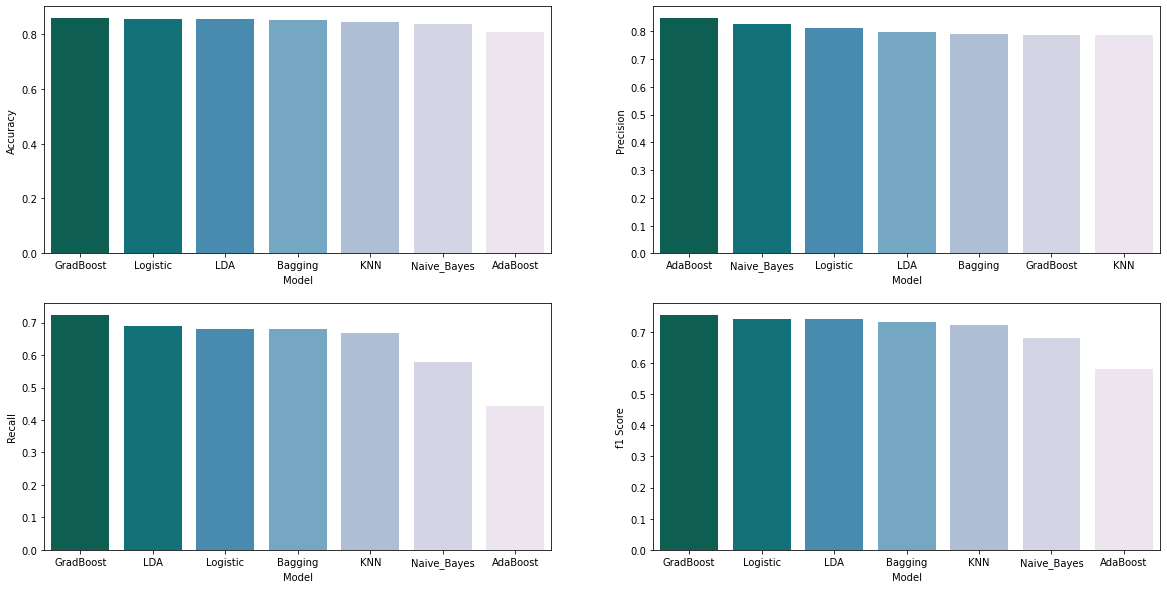

In [277]:
#Visualing the model metrics
fig,axes = plt.subplots(2,2,figsize=(20,10))
cols = list(all_model_metric.columns)[1:]
for i,j in zip(cols,axes.flatten()):
    sns.barplot(x='Model',y=i,data=all_model_metric.sort_values(by=i,ascending=False),ax=j,palette='PuBuGn_r')

### 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.